In [1]:
from spectacle.core.spectra import Spectrum1D
from spectacle.modeling.models import Absorption1D
from spectacle.core.lines import Line
from spectacle.process.lsf import COSLSF
import matplotlib.pyplot as plt
import numpy as np
from spectacle.analysis.metrics import correlate, npcorrelate, cross_correlate, autocorrelate

INFO:root:Added misty to custom loaders.
INFO:root:Added my-format to custom loaders.


In [2]:
%matplotlib notebook
plt.rcParams["figure.figsize"] = [12, 12]
plt.rcParams["figure.dpi"] = 80

<IPython.core.display.Javascript object>


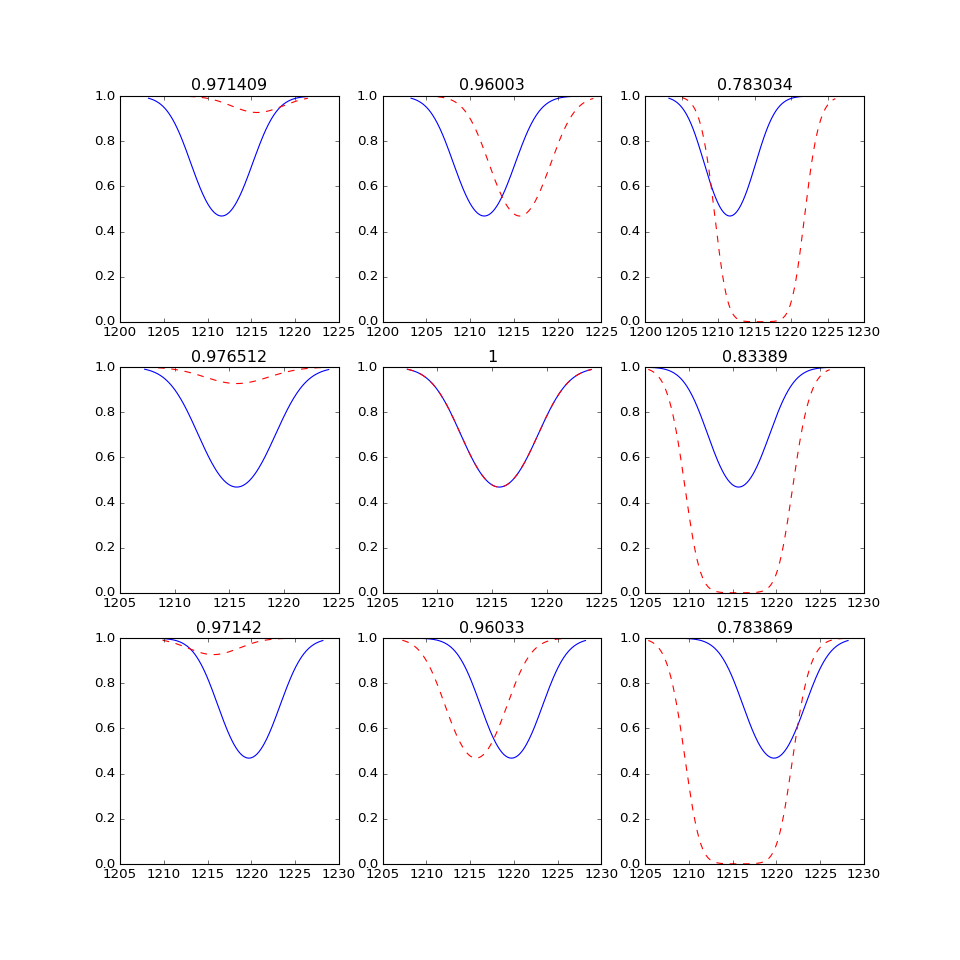

<IPython.core.display.Javascript object>


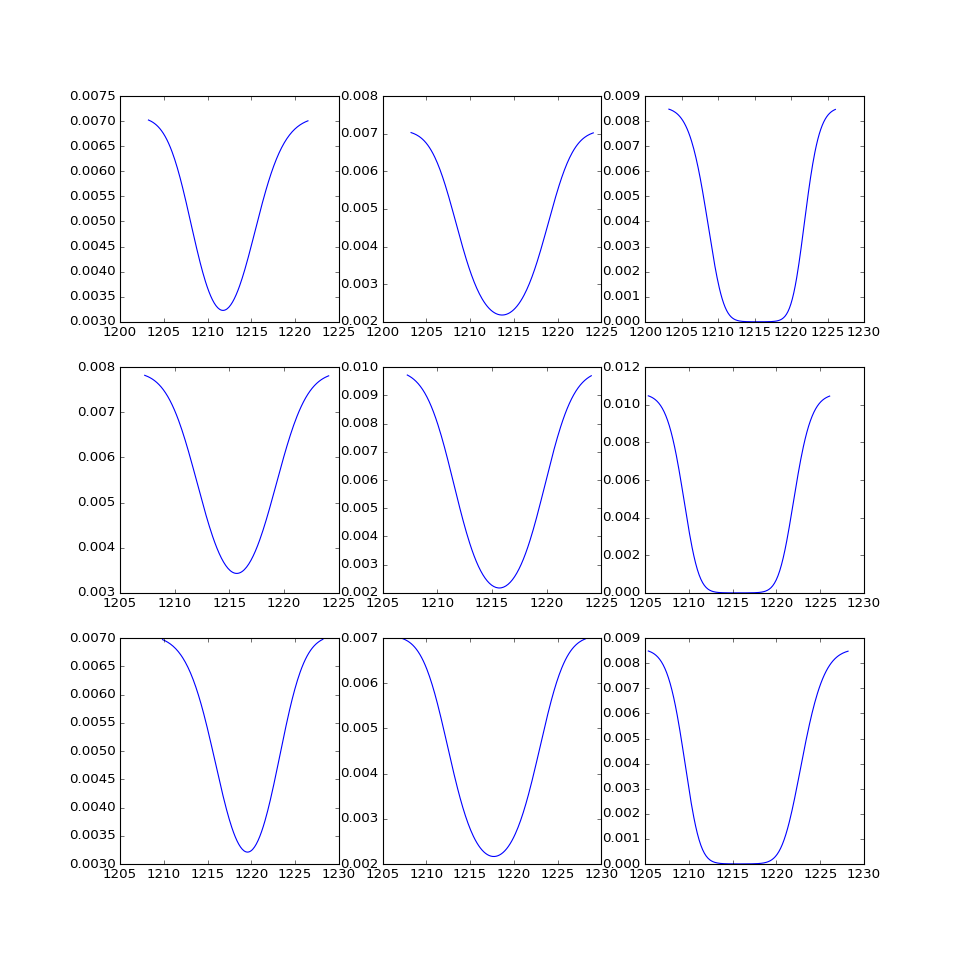

In [11]:
f, axes = plt.subplots(3, 3)
f2, axes2 = plt.subplots(3, 3)

delta_lambda_range = np.linspace(-1000, 100, 3)
delta_v_range = [-1e8, 0.0, 1e8]
v_doppler_range = np.logspace(7, 9, 3)
column_density_range = np.logspace(14, 16, 3)

use_velocity = False

for i, row in enumerate(axes):
    for j, ax in enumerate(row):
        disp = np.linspace(1150, 1250, 1000)
        
        # Create spectrum objects
        line = Line(name="HI1216", 
                    v_doppler=v_doppler_range[1], 
                    column_density=column_density_range[1],
                    delta_v=delta_v_range[i])
        spectrum_model1 = Absorption1D(lines=[line])
        spectrum1 = spectrum_model1(disp)
        
        line = Line(name="HI1216", 
                    v_doppler=v_doppler_range[1],
                    column_density=column_density_range[j])
        spectrum_model2 = Absorption1D(lines=[line])
        spectrum2 = spectrum_model2(disp)
        
        # Calculate correlation
        corr, corr_err, use_mask = correlate(spectrum1, spectrum2)
        
        # --------
        # Plotting
        # --------
        
        # If we want to use velocity space or wavelength space
        if use_velocity:
            ax.plot(spectrum1.velocity(mask=use_mask), spectrum1.data[use_mask])
            ax.plot(spectrum2.velocity(mask=use_mask), spectrum2.data[use_mask], 'r--')
        else:
            ax.plot(spectrum1.dispersion[use_mask], spectrum1.data[use_mask])
            ax.plot(spectrum2.dispersion[use_mask], spectrum2.data[use_mask], 'r--')
        
        ax.set_ylim(0.0, 1.0)
        ax.set_title("{:1.6g}".format(np.sum(corr)))
        
        
        if use_velocity:
            axes2[i][j].plot(spectrum1.velocity(mask=use_mask), corr)
        else:
            axes2[i][j].plot(spectrum1.dispersion[use_mask], corr)
        
f.text(0.5, -0.04, 'Vary $\Delta v$', ha='center')
f.text(-0.04, 0.5, 'Vary Column Density', va='center', rotation='vertical')

In [12]:
f, axes = plt.subplots(3, 3)
f2, axes2 = plt.subplots(3, 3)

delta_lambda_range = np.linspace(-1000, 100, 3)
delta_v_range = [-1e8, 0.0, 1e8]
v_doppler_range = np.logspace(7, 9, 3)
column_density_range = np.logspace(14, 16, 3)

use_velocity = True

for i, row in enumerate(axes):
    for j, ax in enumerate(row):
        disp = np.linspace(1150, 1250, 1000)
        
        # Create spectrum objects
        line = Line(name="HI1216", 
                    v_doppler=v_doppler_range[1], 
                    column_density=column_density_range[1],
                    delta_v=delta_v_range[i])
        spectrum_model1 = Absorption1D(lines=[line])
        spectrum1 = spectrum_model1(disp)
        
        line = Line(name="HI1216", 
                    v_doppler=v_doppler_range[1],
                    column_density=column_density_range[j])
        spectrum_model2 = Absorption1D(lines=[line])
        spectrum2 = spectrum_model2(disp)
        
        # Calculate correlation
        corr, corr_err, use_mask = correlate(spectrum1, spectrum2)
        
        # --------
        # Plotting
        # --------
        
        # If we want to use velocity space or wavelength space
        if use_velocity:
            ax.plot(spectrum1.velocity(mask=use_mask), spectrum1.data[use_mask])
            ax.plot(spectrum2.velocity(mask=use_mask), spectrum2.data[use_mask], 'r--')
        else:
            ax.plot(spectrum1.dispersion[use_mask], spectrum1.data[use_mask])
            ax.plot(spectrum2.dispersion[use_mask], spectrum2.data[use_mask], 'r--')
        
        ax.set_ylim(0.0, 1.0)
        ax.set_title("{:1.6g}".format(np.sum(corr)))
        
        
        if use_velocity:
            axes2[i][j].plot(spectrum1.velocity(mask=use_mask), corr)
        else:
            axes2[i][j].plot(spectrum1.dispersion[use_mask], corr)
        
f.text(0.5, -0.04, 'Vary $\Delta v$', ha='center')
f.text(-0.04, 0.5, 'Vary Column Density', va='center', rotation='vertical')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>